## Facebook's Prophet Library

- 페이스북에 존재하는 업무 데이터 셋을 예측하기 위해 고안된 것
- 일간/분 단위의 타임 스탬프 데이터셋으로 큰 데이터셋
- 페이스북은 매일, 분 단위로 계속 변화를 추척하고 있음
- 일일 데이터나 분 데이터 같이 정확한 타임스탬프가 없는 데이터셋을 활용해 페이스북 예측 라이브러리를 사용하는 방법
- 관련 논문 : https://peerj.com/preprints/3190.pdf

- Prophet 예측 프로시저는 4가지 주요 컴포넌트를 가진 가법 회귀 모형
- 구분적 선형, 또는 로지스틱 성장 곡선을 보임
- (1) 프로시저가 데이터로부터 변경점을 선택하여 추세 변화를 자동으로 감지
- (2) 푸리에 급수를 이용한 연 단위의 계정성 컴포넌트
- (3) 더미 변수를 이용하는 주 단위 계절성 컴포넌트
- (4) 사용자가 제공하는 주요 공휴일 목록

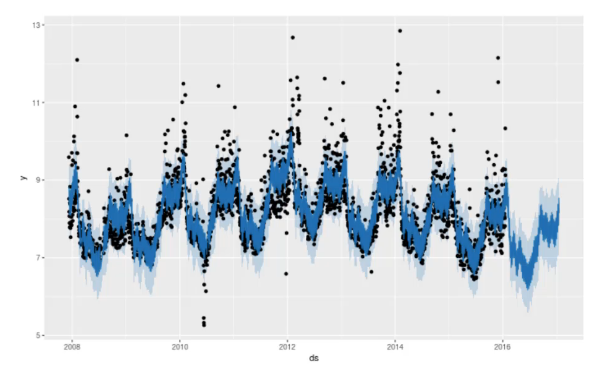

- 결과 화면에서 실제 데이터는 왼편에 검은 점으로 표시가 되고 그 데이터가 피팅되는지 볼 수 있음
- 그래프에서 각각의 레이블에 대해 예측값에 대한 상한선과 하한선이 있어 모델에 대한 대략적 신뢰도 확인 가능

### 1. 페이스북의 Prophet 예측 라이브러리

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('data/BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


- **`페이스북 예측 라이브러리가 작동하는 방식 : 데이터셋의 열 부분이 ds와 y로 분류되어 있어야 함`**

In [5]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


- **`ds 열이 pandas의 날짜/시간 객체여야함`**

In [6]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


- 기본적인 예측 모델은 `일간 데이터`를 예측

In [8]:
m = Prophet()

m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# 플레이스 홀더 데이터프레임 만들기

future = m.make_future_dataframe(periods=24, freq='MS') # 어느 정도 기간만큼 예측할 것인지
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [10]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


-> future 객체에서는 ds열에 우리가 원하는 만큼의 기간이 연장되어 있음

In [11]:
print(df.shape)
print(future.shape)

(324, 2)
(348, 1)


In [12]:
# 미래 예측

forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1771.312291,1148.177757,1481.687475,1771.312291,1771.312291,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,-461.653037,0.0,0.0,0.0,1309.659254
1,1992-02-01,1774.175336,1182.162000,1510.144330,1774.175336,1774.175336,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,-427.115870,0.0,0.0,0.0,1347.059466
2,1992-03-01,1776.853668,1423.867759,1758.924375,1776.853668,1776.853668,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,-178.790756,0.0,0.0,0.0,1598.062912
3,1992-04-01,1779.716713,1426.064414,1742.422436,1779.716713,1779.716713,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,-196.311692,0.0,0.0,0.0,1583.405020
4,1992-05-01,1782.487401,1674.093961,1988.975013,1782.487401,1782.487401,44.675263,44.675263,44.675263,44.675263,44.675263,44.675263,0.0,0.0,0.0,1827.162664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,5200.823239,5072.565242,5403.826062,5189.486860,5213.317357,39.703050,39.703050,39.703050,39.703050,39.703050,39.703050,0.0,0.0,0.0,5240.526290
344,2020-09-01,5216.882602,4922.898258,5252.479097,5204.326182,5230.268187,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,-133.367528,0.0,0.0,0.0,5083.515075
345,2020-10-01,5232.423922,5020.842817,5353.869361,5218.739448,5246.861460,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,-43.400195,0.0,0.0,0.0,5189.023726
346,2020-11-01,5248.483285,5170.507188,5502.756553,5233.589881,5264.018501,86.835312,86.835312,86.835312,86.835312,86.835312,86.835312,0.0,0.0,0.0,5335.318596


In [13]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

- yhat (예상 수치)

In [14]:
forecast[['ds','yhat_lower','yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1148.177757,1481.687475,1309.659254
1,1992-02-01,1182.162000,1510.144330,1347.059466
2,1992-03-01,1423.867759,1758.924375,1598.062912
3,1992-04-01,1426.064414,1742.422436,1583.405020
4,1992-05-01,1674.093961,1988.975013,1827.162664
...,...,...,...,...
343,2020-08-01,5072.565242,5403.826062,5240.526290
344,2020-09-01,4922.898258,5252.479097,5083.515075
345,2020-10-01,5020.842817,5353.869361,5189.023726
346,2020-11-01,5170.507188,5502.756553,5335.318596


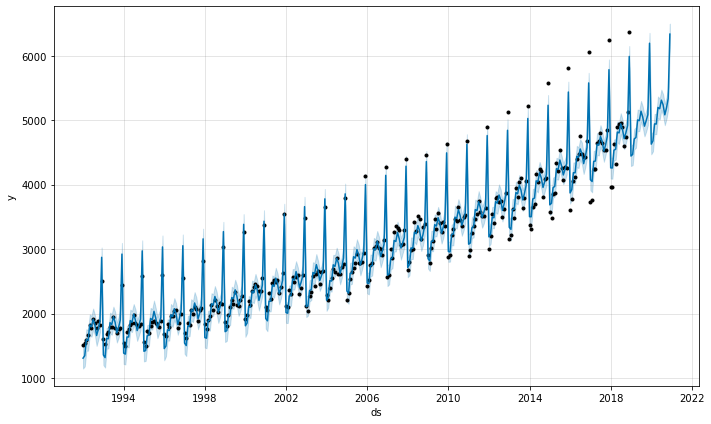

In [15]:
m.plot(forecast);

-> 1992년부터의 추세 와 이후 2년간의 예측 결과 나타남
- 음영으로 상한선과 하한선도 표시되어 있음

ConversionError: Failed to convert value(s) to axis units: '2014-01-01'

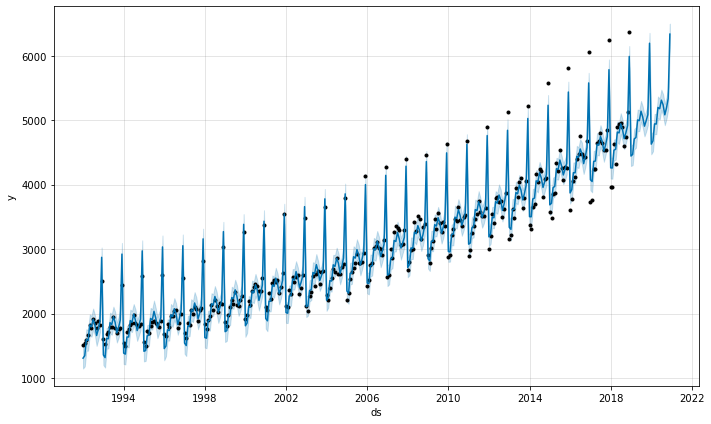

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

m.plot(forecast);
plt.xlim('2014-01-01','2021-01-01')

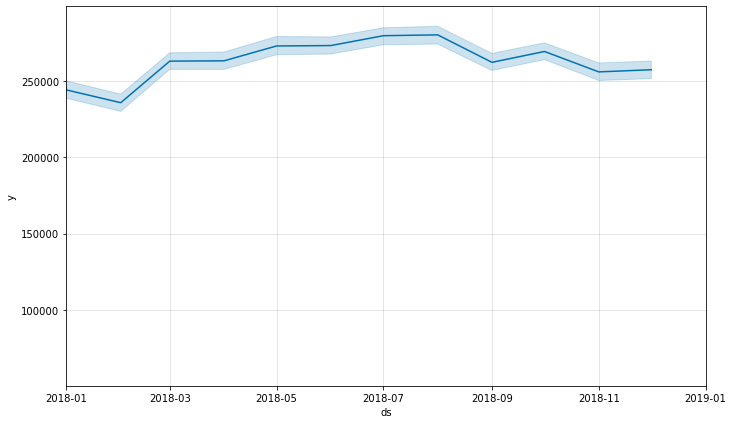

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

m.plot(forecast);
plt.xlim((pd.to_datetime('2014-01-01'),pd.to_datetime('2021-01-01')));

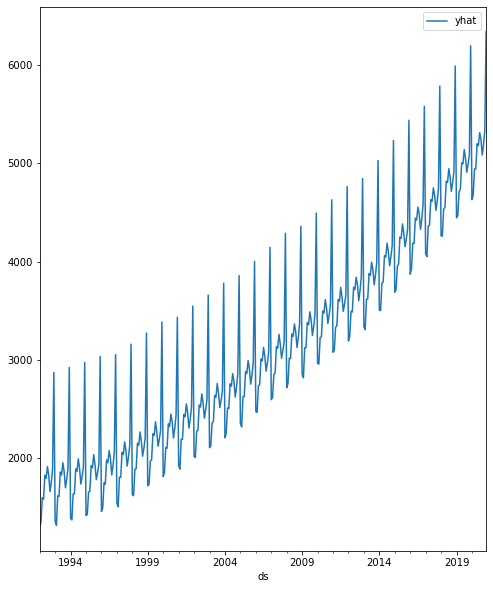

In [20]:
forecast.plot(x='ds', y='yhat', figsize=(8,10));

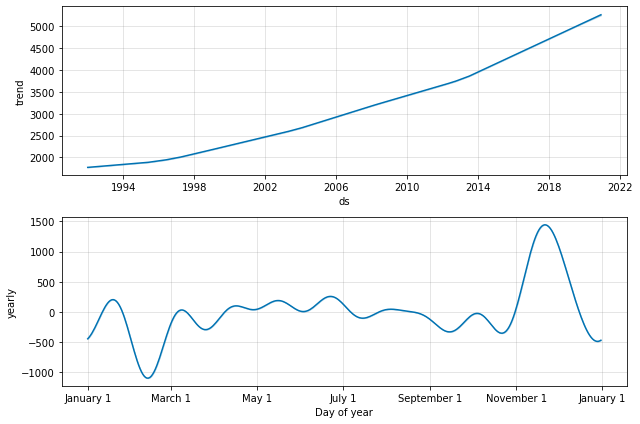

In [21]:
m.plot_components(forecast);

-> 추세에 대한 플롯과 연 단위 컴포넌트 플롯 (연 단위 움직임을 볼 수 있음)
- 맥주,와인 같은 주류 판매량에 대한 것으로 휴일 근처에 가서 그래프가 높게 그려짐
- 2월과 3월 즈음에 나타난 급격한 감소량도 볼 수 있음

### (3) 페이스북의 Prophet 예측 평가

In [22]:
df = pd.read_csv('data/Miles_Traveled.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [24]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [26]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


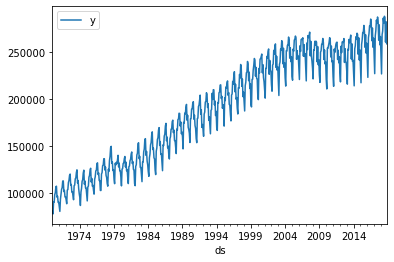

In [27]:
df.plot(x='ds', y='y');

#### 훈련데이터/테스트데이터 split

In [28]:
df.shape

(588, 2)

-> test 데이터셋 12로 지정

In [29]:
df.shape[0]-12

576

In [30]:
train = df.iloc[:576]
test = df.iloc[576:]

In [32]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS') # 일단위라면 기본값이라, 주기를 명시할 필요 없음
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94181.559784,69874.389498,81282.464247,94181.559784,94181.559784,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,0.0,0.0,0.0,75581.762139
1,1970-02-01,94493.496722,61636.012218,73413.171509,94493.496722,94493.496722,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,0.0,0.0,0.0,67384.662111
2,1970-03-01,94775.246215,88967.182900,100358.572156,94775.246215,94775.246215,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,0.0,0.0,0.0,94738.946557
3,1970-04-01,95087.183153,89546.982095,100888.770472,95087.183153,95087.183153,27.606045,27.606045,27.606045,27.606045,27.606045,27.606045,0.0,0.0,0.0,95114.789197
4,1970-05-01,95389.057609,99226.989507,111136.520267,95389.057609,95389.057609,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,0.0,0.0,0.0,104999.801624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2018-08-01,263557.251253,273991.713481,285632.382152,263473.602039,263592.491381,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,0.0,0.0,0.0,280000.766709
584,2018-09-01,263701.749361,256679.941187,267888.052630,263584.784747,263761.337061,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,0.0,0.0,0.0,262025.915409
585,2018-10-01,263841.586239,263805.942467,274788.782192,263695.070221,263924.158969,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,0.0,0.0,0.0,269134.754137
586,2018-11-01,263986.084347,250127.927715,261606.863826,263799.185140,264099.289622,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,0.0,0.0,0.0,255767.524882


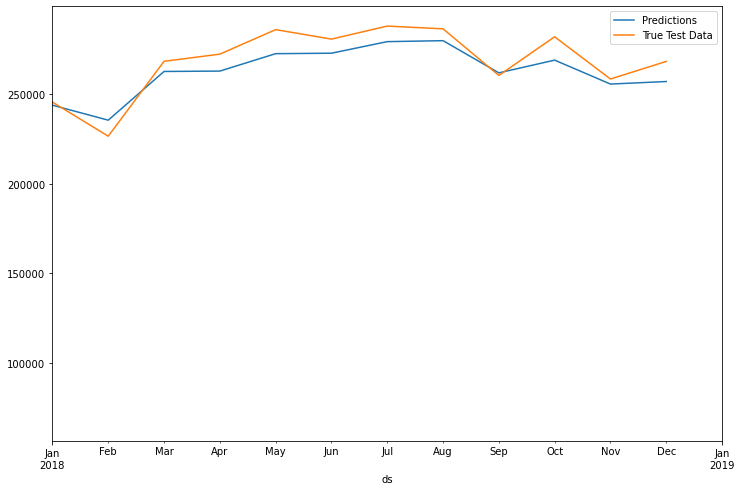

In [47]:
ax = forecast.plot(x='ds', y='yhat', label='Predictions', legend=True, figsize=(12,8))
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=(('2018-01-01','2019-01-01')));

#### 표준오차

In [48]:
from statsmodels.tools.eval_measures import rmse

In [50]:
predictions = forecast.iloc[-12:]['yhat']

In [51]:
predictions 

576    243969.272997
577    235604.734139
578    262807.783513
579    263016.187323
580    272739.162173
581    272999.948918
582    279459.160887
583    280000.766709
584    262025.915409
585    269134.754137
586    255767.524882
587    257193.315841
Name: yhat, dtype: float64

In [52]:
rmse(predictions, test['y'])

8524.084735454997

In [53]:
test.mean()

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


y    268739.666667
dtype: float64

- 테스트 데이터셋에서 평균값은 약 268,700 표준오차는 1만이하 (나쁜 편은 아님)

#### Prophet 예측 모델(교차 검증 자체 진단 기능)
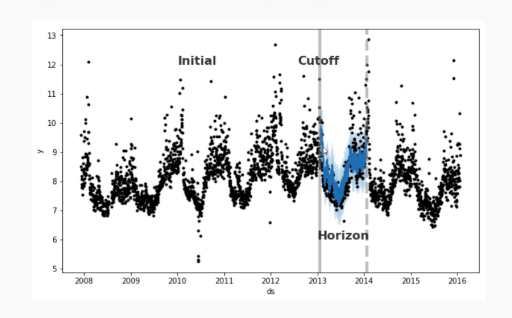

In [54]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [56]:
initial = 5 * 365 # 초기 훈련 기간 :  5년
initial = str(initial) + ' days'  # 형식
initial

'1825 days'

In [58]:
# 교차 검증을 진행할 간격 ( 몇 회의 구간을 지정할 것인지)
period = 5 * 365
period = str(period) + ' days' # 매 5년으로 구간 지정 
period

'1825 days'

In [60]:
# 각각 간격에 대한 예측 기간 (각 구간에 대해 어느 시점 까지 예측?)
horizon = 365
horizon = str(horizon) + ' days'
horizon


'365 days'

##### 교차검증

In [62]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [63]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087397,107112.859952,109891.186894,102445.0,1976-12-11
1,1977-02-01,102996.111518,101537.283425,104538.270641,102416.0,1976-12-11
2,1977-03-01,118973.318133,117476.163241,120393.789199,119960.0,1976-12-11
3,1977-04-01,120612.923726,119160.988130,122125.071000,121513.0,1976-12-11
4,1977-05-01,127883.031847,126459.119039,129313.733010,128884.0,1976-12-11
...,...,...,...,...,...,...
103,2017-08-01,273428.687331,267580.768448,279094.507375,283184.0,2016-12-01
104,2017-09-01,255549.432466,250226.324259,261161.183054,262673.0,2016-12-01
105,2017-10-01,262654.930528,256826.237070,268287.820513,278937.0,2016-12-01
106,2017-11-01,249307.398711,243679.420993,255002.629068,257712.0,2016-12-01


- ds 타임스탬프, 예측값, 예측 상한값, 예측 하한값, 중단점

In [64]:
df_cv.shape

(108, 6)

-> 구간을 5년으로 설정했기 때문에

In [65]:
# 원시데이터
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.440480e+07,4940.121674,4543.226142,0.027839,0.023430,0.4
1,53 days,2.189073e+07,4678.753115,4275.518107,0.025071,0.023430,0.4
2,54 days,1.845424e+07,4295.839617,3751.881988,0.020184,0.022341,0.5
3,55 days,2.353986e+07,4851.789757,4286.500962,0.023332,0.023430,0.4
4,57 days,2.121071e+07,4605.508636,4011.466093,0.021541,0.022341,0.5
...,...,...,...,...,...,...,...
94,360 days,1.844636e+07,4294.922982,3768.283191,0.019668,0.019608,0.5
95,361 days,1.755041e+07,4189.321092,3487.275332,0.018267,0.019006,0.5
96,362 days,3.171401e+07,5631.519540,4404.117322,0.022028,0.024617,0.4
97,364 days,3.002471e+07,5479.480904,4245.018294,0.021435,0.021653,0.5


-> 평균 제곱 오차, 평균 제곱근 오차, 평균 절대 오차, mape, 평균 절대 백분율 오차

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


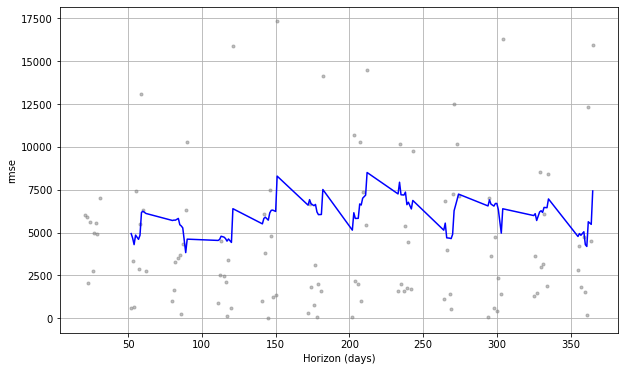

In [67]:
plot_cross_validation_metric(df_cv, metric='rmse');

->  우리의 추정치에 대한 기간별 평균 제곱근 오차

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


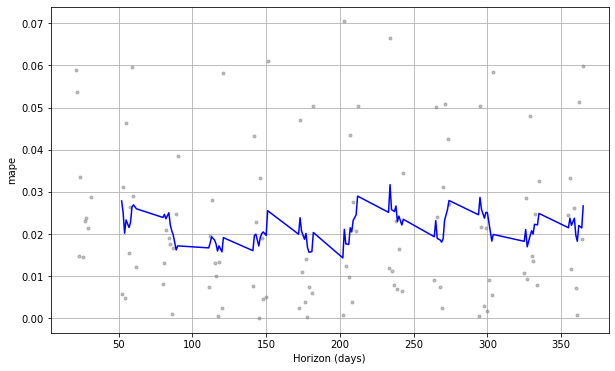

In [68]:
plot_cross_validation_metric(df_cv, metric='mape');

### (4) 페이스북의 Prophet 추세

In [69]:
df = pd.read_csv('data/HospitalityEmployees.csv')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1990-01-01,1064.5
1,1990-02-01,1074.5
2,1990-03-01,1090.0
3,1990-04-01,1097.4
4,1990-05-01,1108.7


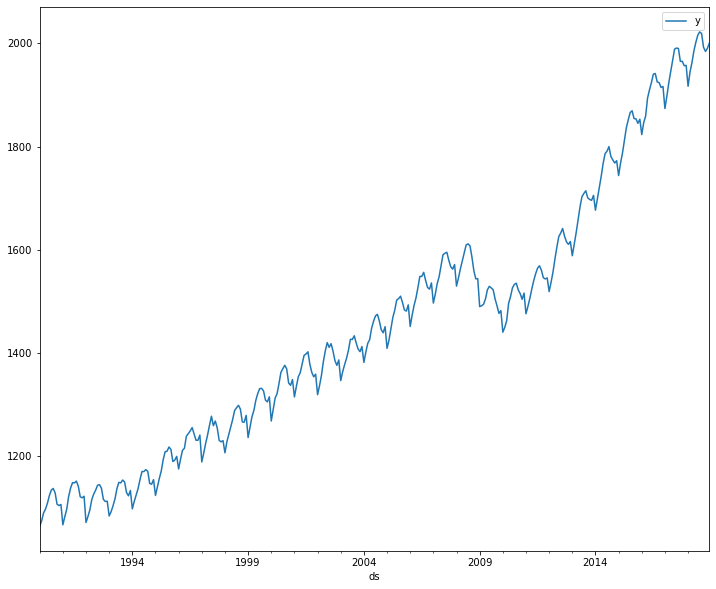

In [71]:
df.plot(x='ds', y='y', figsize=(12,10));

-> 이 병원에 근무중인 직원의 인원수 확인 (2008년 전후에 발생한 경기 후퇴로 추세 변경 확인)
- 1994년과 90년대 후반을 비교했을 때, 시작은 천천히 올라갔다가 어느 순간 증가폭이 커지고 추세선도 올라감
- 2010년 중, 말쯤에 추세선이 안정적이고 경향이 5년간 거의 변하지 않았음

In [72]:
m = Prophet()
m.fit(df)
futrue = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,985.323522,924.093936,949.945701,985.323522,985.323522,-47.615384,-47.615384,-47.615384,-47.615384,-47.615384,-47.615384,0.0,0.0,0.0,937.708138
1,1970-02-01,985.840822,940.294149,965.099233,985.840822,985.840822,-33.159370,-33.159370,-33.159370,-33.159370,-33.159370,-33.159370,0.0,0.0,0.0,952.681452
2,1970-03-01,986.308060,955.268287,980.463066,986.308060,986.308060,-18.675629,-18.675629,-18.675629,-18.675629,-18.675629,-18.675629,0.0,0.0,0.0,967.632431
3,1970-04-01,986.825360,970.639897,995.939686,986.825360,986.825360,-3.017789,-3.017789,-3.017789,-3.017789,-3.017789,-3.017789,0.0,0.0,0.0,983.807570
4,1970-05-01,987.325972,987.766819,1012.554594,987.325972,987.325972,13.305066,13.305066,13.305066,13.305066,13.305066,13.305066,0.0,0.0,0.0,1000.631038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2018-08-01,2020.248476,2035.640355,2060.616516,2020.248476,2020.248476,28.164804,28.164804,28.164804,28.164804,28.164804,28.164804,0.0,0.0,0.0,2048.413280
584,2018-09-01,2025.760122,2025.762787,2051.834995,2025.760122,2025.760122,12.364300,12.364300,12.364300,12.364300,12.364300,12.364300,0.0,0.0,0.0,2038.124421
585,2018-10-01,2031.093972,2012.250862,2037.515657,2031.093972,2031.093972,-5.554078,-5.554078,-5.554078,-5.554078,-5.554078,-5.554078,0.0,0.0,0.0,2025.539894
586,2018-11-01,2036.605618,2011.202030,2036.425778,2036.605618,2036.605618,-13.021026,-13.021026,-13.021026,-13.021026,-13.021026,-13.021026,0.0,0.0,0.0,2023.584592


In [74]:
from fbprophet.plot import add_changepoints_to_plot

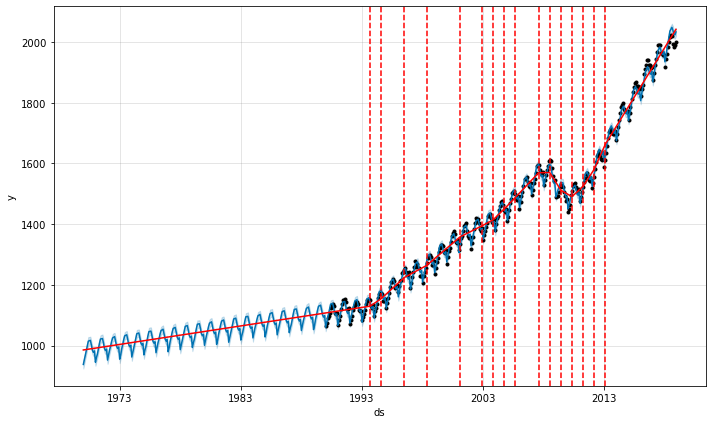

In [75]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

- 실제 추세의 변화 확인 가능 
- 90년대 초반은 서서히 올라가는 안정적인 추세였다가, 2000년대까지 조금씩 추세가 바뀜
- 안정적인 추세선은 미래 예상 모델을 따라 계속 뻗어나감

### (5) 페이스북의 Prophet 계절성

- 덧셈 컴포넌트, 곱셈 컴포넌트를 통해 어떻게 계절성을 변경할 수 있는지

In [76]:
df = pd.read_csv('data/airline_passengers.csv')

In [77]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


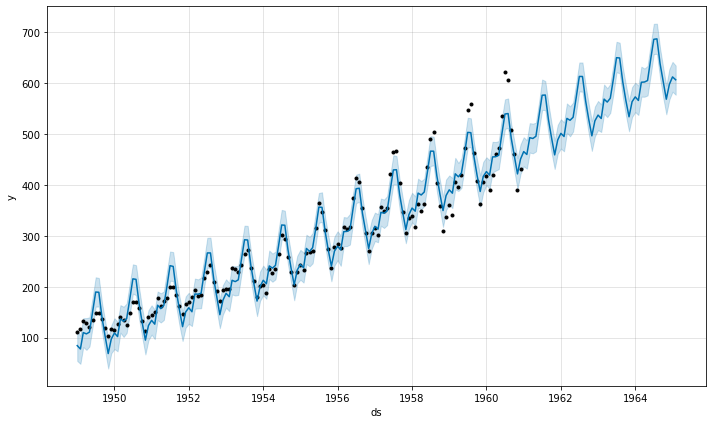

In [78]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

-> 안정적으로 증가한다기 보다 시간에 따라 성장하는 것처럼 보임 

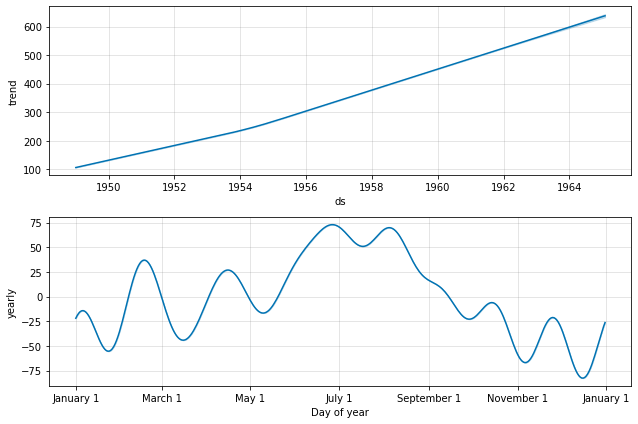

In [79]:
# 컴포넌트

fig = m.plot_components(forecast)

-> 추세선과 연간 계절성에 대한 그래프

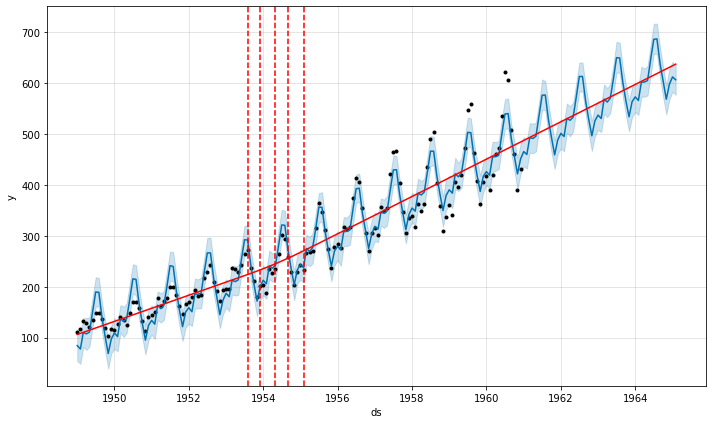

In [80]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

- 50년대 중반쯤에 항공기 탑승객과 제트 엔진 양쪽 모두에 큰 변화가 일어난 것으로 보이고, 그 시점에 여러 변화가 일어난 것이 확인 됨

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


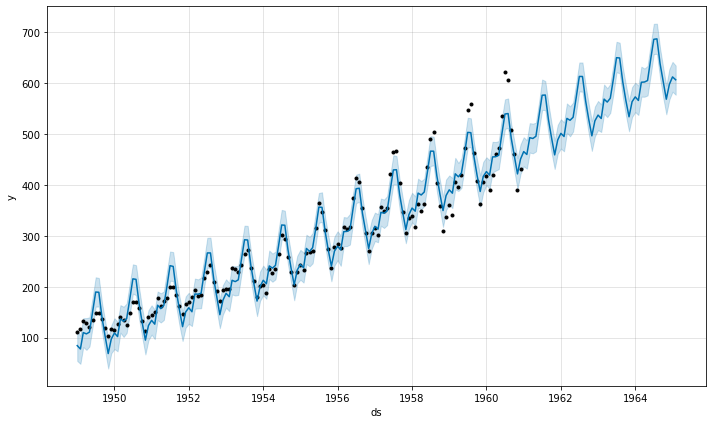

In [82]:
# 계절성을 곱셈 모델로 변경

m = Prophet(seasonality_mode = 'multiplicative')
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forcast = m.predict(future)
fig = m.plot(forecast)

-> 시간에 따라 계절성과 추이가 더 깔끔하게 보임
-> 계절성 컴포넌트를 보면 갈수록 점점 커지고 있음

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


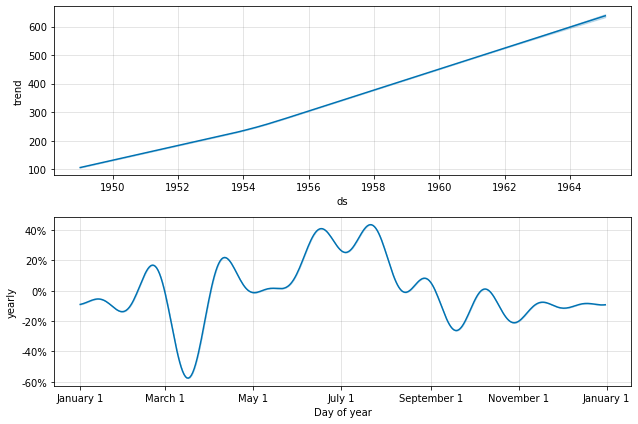

In [83]:
fig = m.plot_components(forecast)

-> 추세선과 일반적인 계절성

`특정 데이터셋의 경우 시간에 따라 계절성이 바뀜`
-> 그렇게 되면 계절성 변화 모드를 곱셈 모드로 바꾸어야 함